In [2]:
import pandas as pd

blood_transfusion = pd.read_csv("../data/blood_transfusion.csv")
data = blood_transfusion.drop(columns="Class")
target = blood_transfusion["Class"]

In [3]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
#aed
model = make_pipeline(
    StandardScaler(),
    SVC()
)

In [4]:

from sklearn.model_selection import cross_validate, ShuffleSplit
import pandas as pd

cv = ShuffleSplit(random_state=0)

cv_results = cross_validate(
    model, data, target,
    cv=cv, n_jobs=2
)
cv_results = pd.DataFrame(cv_results)
cv_results

,fit_time,score_time,test_score
0,0.023935,0.006778,0.680000
1,0.021598,0.006296,0.746667
2,0.006156,0.011818,0.786667
3,0.013306,0.007947,0.800000
4,0.014164,0.002011,0.746667
5,0.013659,0.000000,0.786667
6,0.015614,0.003937,0.800000
7,0.015614,0.003937,0.826667
8,0.009775,0.002024,0.746667
9,0.010046,0.000000,0.733333


In [5]:
print(
    "Accuracy score of our model:\n"
    f"{cv_results['test_score'].mean():.3f} ± "
    f"{cv_results['test_score'].std():.3f}"
)

Accuracy score of our model:
0.765 ± 0.043


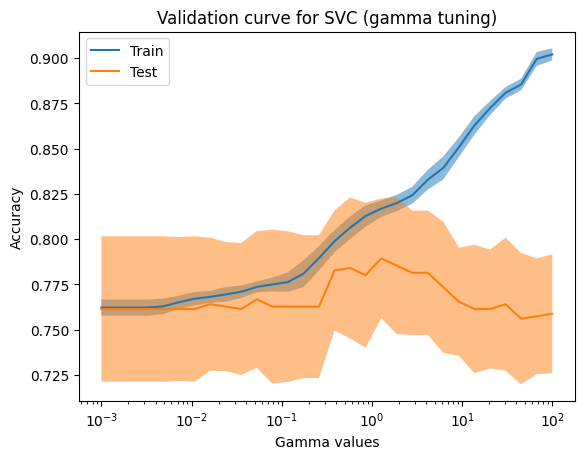

In [6]:
import numpy as np
from sklearn.model_selection import ValidationCurveDisplay

gammas = np.logspace(-3, 2, num=30)
param_name = "svc__gamma"

disp = ValidationCurveDisplay.from_estimator(
    model,
    data,
    target,
    param_name=param_name,
    param_range=gammas,
    cv=cv,
    scoring="accuracy",
    errorbar_kw={"alpha": 0.7},
    n_jobs=2
)

_ = disp.ax_.set(
    xlabel="Gamma values",
    title="Validation curve for SVC (gamma tuning)"
)